In [1]:
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram #for plotting histogram
import numpy as np # for mathematical computation
import matplotlib.pyplot as plt #for plotting graph
%matplotlib inline

from qiskit import Aer  # change this to Aer for C++ compiled code and the option to run on the GPU. Or use BasicAer for python providers
from qiskit.algorithms import VQE

In [2]:
from qiskit.opflow import MatrixOp

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from cmath import e
from cmath import pi
import cmath
import sympy as sym
from tqdm import tqdm

from scipy import sparse
from scipy.sparse import csr_matrix

from scipy.linalg import expm, logm

from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs, eigsh

from operators_csc_Nov25 import *

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import quspin
import pandas as pd
from tqdm import tqdm
from scipy.integrate import quad
from scipy.optimize import curve_fit
import csv
import scipy.stats
from scipy.linalg import logm, expm

from quspin.operators import hamiltonian,exp_op
from quspin.basis import spinful_fermion_basis_general
from quspin.basis import spin_basis_1d
from quspin.basis import spinless_fermion_basis_1d
from quspin.basis import tensor_basis
from quspin.tools.measurements import ent_entropy

from matplotlib import rc


from quspin.tools.evolution import evolve
from quspin.tools.Floquet import Floquet_t_vec 
from six import iteritems 


ModuleNotFoundError: No module named 'quspin'

# Hamiltonian

In [ ]:
def f(N,a,n,t):
    FF=0
    if a*abs(n-int(0.5*N))<t-1:
        FF=-1
        
    else:
        FF=0
    
        
    return FF

In [6]:
n_site = 12
a = 1
m=1
g=1


J = 0.5*g*g*a


t_max = int(0.5*n_site)
step_max = 10*t_max

dt = t_max/step_max

t_arr = [dt*step for step in range(1,step_max+1)]
List_site=[i for i in range(n_site)]

data=[]
#data_KI_chiral=[]

for t in t_arr:
    data_t=[]
    for n in List_site:
        res=f(n_site,a,n,t)
        data_t.append(res)
        #data_KI_chiral.append([M, mu, res])
        
    data.append(data_t)

0


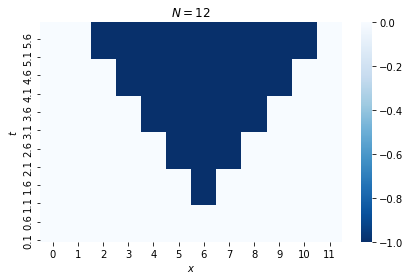

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib
plt.figure()

t_val=[round(t_arr[i], 1) for i in range(len(t_arr))]
List_x_val_even=[round(List_site[i], 1) for i in range(len(List_site))]
#List_x_val_odd=[round(List_x_odd[i], 1) for i in range(len(List_x_odd))]

df= pd.DataFrame(data, index=t_val, columns=List_x_val_even)
#df_odd= pd.DataFrame(data, index=t_val, columns=List_x_val_odd)
ax=sns.heatmap(df, xticklabels=1, yticklabels=5,cmap='Blues_r') #CMRmap, PuOr, bwr
ax.invert_yaxis()
#ax.set_xticklabels([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
plt.xlabel("$x$")
plt.ylabel("$t$")

max_val=max(list(map(lambda x: max(x), data)))
print(max_val)


data_2d=np.array(data)
idx = np.unravel_index(np.argmax(data_2d), data_2d.shape)



#print((n_arr[idx[0]],M_arr[idx[1]]))
#plt.title(r"$m/g=-0.2,~\theta=$"f"{theta}")
plt.title(f"$N={n_site}$")
plt.tight_layout()
#plt.savefig("CMW_Charge_even_N"+str(N)+"_m"+str(M)+".png")
plt.show()

In [ ]:
def H_opn(t,N,J,a,M): #T2>T1
    

    h_xy = [[0.25/a,n,(n+1)] for n in range(0,N-1)]
    h_zM = [[0.5*M*(-1)**(n+1),n] for n in range(0,N)]
    
    h_zz = [[0.25*J,n,m] for k in range(0,N-1) for n in range(0,k+1) for m in range(0,k+1)] #OK
    h_zJ = [[0.5*J*(-1)**(k+1),m] for n in range(0,N-1) for m in range(0,n+1) for k in range(0,n+1)] #OK
    
    h_ext=[[J*f(N,a,n,t), m] for n in range(N-1) for m in range(n+1)]
    

    
    basis = spin_basis_1d(N)


    # Define Hamiltonian
    static = [["xx",h_xy],["yy",h_xy],["z",h_zM],["zz",h_zz],["z",h_zJ],["z", h_ext]
    
    dynamic = []
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float64,
                    check_symm=False,check_herm=False,check_pcon=False)
    
    
    return H

# Quantum Simulation

In [6]:
from IPython.display import display
import cmath
from sympy import symbols, solve
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, \
    BasicAer, execute, IBMQ, __qiskit_version__,Aer
from qiskit.tools.visualization import plot_histogram
import qiskit
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import noise
from qiskit.compiler import assemble
import qiskit.quantum_info as qi

from qiskit import IBMQ
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.providers.ibmq import least_busy


# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

# Auxiliary methods
from qiskit.quantum_info import Choi, Kraus
from qiskit.extensions import HGate, XGate

/var/folders/99/mmjzyjl96t1b35jdmmbhghg00000gs/T/ipykernel_2768/1590269671.py:19: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


In [7]:
#IBMQ.active_account()
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [1]:
TOKEN=""
HUB=""
GROUP=""
PROJECT=""

IBMQ.save_account(TOKEN, overwrite=True)

NameError: name 'IBMQ' is not defined

In [9]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>]

In [10]:
#IBMQ.get_provider(hub='ibm-q-bnl')

provider=IBMQ.get_provider(hub='ibm-q-bnl')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>,
 <IBMQ

In [13]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 20
                                   and not x.configuration().simulator)
backend=least_busy(small_devices)

In [14]:
print("Name", backend.name())
print("Status", backend.status())
print("Limit",backend.job_limit())
print("Remaining Jobs",backend.remaining_jobs_count())
print("Number of Active Jobs",backend.active_jobs())

Name ibm_cairo
Status <qiskit.providers.models.backendstatus.BackendStatus object at 0x131e20be0>
Limit <qiskit.providers.ibmq.backendjoblimit.BackendJobLimit object at 0x131e67a90>
Remaining Jobs None
Number of Active Jobs []


In [15]:
#backend = provider.get_backend('ibm_washington')
backend = provider.get_backend('ibm_cairo')
#backend = provider.get_backend('ibm_auckland')

#backend = Aer.get_backend('qasm_simulator')
backend

<IBMQBackend('ibm_cairo') from IBMQ(hub='ibm-q-bnl', group='c2qa-projects', project='quantum-sim-for-')>

In [6]:
def f(N,a,n,t):
    FF=0
    if a*abs(n+1-int(0.5*N))<t-1:
        FF=-1
        
    else:
        FF=0
        
    return FF

In [7]:
n_site = 8
a = 1
m=0.2
g=1


J = 0.5*g*g*a


t_max = int(0.5*n_site)
step_max = 10*t_max

dt = t_max/step_max

t_arr = [dt*step for step in range(1,step_max+1)]
List_site=[i for i in range(n_site)]

data=[]
#data_KI_chiral=[]

for t in t_arr:
    data_t=[]
    for n in List_site:
        res=f(n_site,a,n,t)
        data_t.append(res)
        #data_KI_chiral.append([M, mu, res])
        
    data.append(data_t)

0


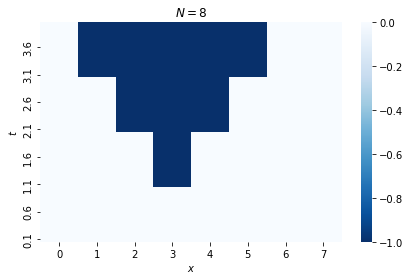

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib
plt.figure()

t_val=[round(t_arr[i], 1) for i in range(len(t_arr))]
List_x_val_even=[round(List_site[i], 1) for i in range(len(List_site))]
#List_x_val_odd=[round(List_x_odd[i], 1) for i in range(len(List_x_odd))]

df= pd.DataFrame(data, index=t_val, columns=List_x_val_even)
#df_odd= pd.DataFrame(data, index=t_val, columns=List_x_val_odd)
ax=sns.heatmap(df, xticklabels=1, yticklabels=5,cmap='Blues_r') #CMRmap, PuOr, bwr
ax.invert_yaxis()
#ax.set_xticklabels([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
plt.xlabel("$x$")
plt.ylabel("$t$")

max_val=max(list(map(lambda x: max(x), data)))
print(max_val)


data_2d=np.array(data)
idx = np.unravel_index(np.argmax(data_2d), data_2d.shape)



#print((n_arr[idx[0]],M_arr[idx[1]]))
#plt.title(r"$m/g=-0.2,~\theta=$"f"{theta}")
plt.title(f"$N={n_site}$")
plt.tight_layout()
#plt.savefig("CMW_Charge_even_N"+str(N)+"_m"+str(M)+".png")
plt.show()

In [16]:


def find_initial_state(m,g,a,HalfLatticeSize):
    sign=(-1)**(HalfLatticeSize+1) # determines the direction of the positive source particle, ensure we do not overlap source-fermion with a fermion field in the initial state

    H_k, H_m, H_E, H_ext, Q, L, L_ext = get_H(HalfLatticeSize, sign)
    Ham = H_k/a + m*H_m + (a*g*g)*H_E
    return ground_state(Ham)


HalfLatticeSize = 2
a = 1
M=1
g=1



# Time Evoliution

In [ ]:
### parameters
n_site = 20
a = 1
M=1
g=1

J = 0.5*g*g*a

t_max = int(0.5*n_site)
step_max = 100*t_max

dt = t_max/step_max

### simulator and shots
simulator = Aer.get_backend('qasm_simulator')

### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)


#######Prepapre Initial State#######
from qiskit.quantum_info import random_statevector
from qiskit.tools.monitor import job_monitor

###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
#for i in range(n_site):
#    if 2*i< n_site:
#        qc.x(qr[2*i+1])

        
psi0=find_initial_state(M,g,a,int(n_site/2))

def state_num2str(basis_state_as_num, nqubits):
    return '{0:b}'.format(basis_state_as_num).zfill(nqubits)

def state_str2num(basis_state_as_str):
    return int(basis_state_as_str, 2)

def state_reverse(basis_state_as_num, nqubits):
    basis_state_as_str = state_num2str(basis_state_as_num, nqubits)
    new_str = basis_state_as_str[::-1]
    return state_str2num(new_str)
def adjust_state(psi):
    adjusted_state = np.zeros(len(psi), dtype=complex)
    for basis_state in range(len(psi)):
        adjusted_state[state_reverse(basis_state, int(np.log2(len(psi))))] = psi[basis_state]
    return adjusted_state



List=[qr[i] for i in range(n_site)]
qc.initialize(adjust_state(psi0),List)        


        
        
qc_meas.measure(qr,cr)

q_time_list_qiskit4=[]
q_mag_list_qiskit4=[]
data_save=[]

q_mag_initial4=[]


job_counter=0
n_shots = 10000

for step in range(1,step_max+1):
    ###edit here###
 
    
    #acting gates to implement one Suzuki-Trotter step
    ###exp(-iH_{XX+YY}\Delta t) #even
    for i in range(n_site-1):
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
        
        qc.rz((0.5/a)*dt, qr[i])
        qc.rz(-(0.5/a)*dt, qr[i+1])
           
        qc.cx(qr[i],qr[i+1])
        qc.h(qr[i])
        qc.cx(qr[i],qr[i+1])
    
    ###exp(-iH_{Z}\Delta t)   mass
    for i in range(n_site):
        qc.rz(M*((-1)**(i+1))*dt,qr[i])
        
        
###exp(-iH_{ZZ}\Delta t)  Electric Field
    #for i in range(1,n_site-1):
     #   for k in range(1,i+1):
      #      for l in range(k):
       #         qc.rzz(J*dt,qr[k],qr[l])  #ok
        
        
    for i in range(1,n_site-1):
        for k in range(0,i):
            for l in range(k+1,i+1):
                #print("k={}, l={}".format(k,l))
                qc.rzz(J*dt,qr[k],qr[l])  #ok
    


        ###exp(-iH_{Z}\Delta t)  Electric Field
    for n in range(n_site-1):
        qc.rz(-0.5*J*dt*(n_site-(n+1)-0.5*(-1+(-1)**(n+1))),qr[n])
        

    
    ###exp(-iH_{Z}\Delta t)    
    for n in range(n_site-1):
        for k in range(n+1):
            coeff = 2*J*f(n_site,a,n,step*dt)*dt
            #print(coeff)
            qc.rz(coeff,qr[k]) 
        

    
    

            
      

        
    

    #add main circuit to measurement circuit to have total circuit
    #qc_total = qc + qc_meas    
    qc_total = qc.compose(qc_meas)    

    #execute circuit
    job = execute(qc_total, simulator, shots=n_shots) #execute Simulator 
    #job = execute(qc_total, backend, shots=n_shots) #execute Quantum Computer
    print('About to run job')   

    job.status()
    job_monitor(job)
    job_counter+=1
    print("Processed",job_counter, "jobs:",100*job_counter/step_max,"% has been done")
    print("Time is",dt*step)
    

    result = job.result() # obtain results
    counts = result.get_counts(qc_total) 
        #compute magnetization
    mag = 0
    
    se=0 #standard error
    
    error=[]
    for orig_bit_string, count in counts.items():

        obs = 0
        bit_string = orig_bit_string[::-1] # we want to start reading the bits from the right to match qiskit convention. 
                                           # Python stores string from the left, as normal people would do. so we need to reverse it.
        for j in range(n_site):
            obs +=(-1)**int(bit_string[j])*(-1)**(j+1)
            
        mag += obs*count/n_shots/(2*a)#/n_site
        
        for i in range(count):
            error.append(obs/(2*a))
        
    #se=np.std(error, ddof=1) / np.sqrt(len(error)) #standard error
    se=np.std(error)
    #mag=np.average(error)
        
        ###until here

    q_time_list_qiskit4.append(dt*step) #append time to the list of time
    

    q_mag_list_qiskit4.append(mag) 
    print("Magnetization is",mag)

    data_save.append([dt*step,mag,se])
    


About to run job
Job Status: job has successfully run
Processed 1 jobs: 0.1 % has been done
Time is 0.01
Magnetization is -8.8418
About to run job
Job Status: job has successfully run
Processed 2 jobs: 0.2 % has been done
Time is 0.02
Magnetization is -8.826400000000003
About to run job
Job Status: job has successfully run
Processed 3 jobs: 0.3 % has been done
Time is 0.03
Magnetization is -8.865599999999997
About to run job
Job Status: job has successfully run
Processed 4 jobs: 0.4 % has been done
Time is 0.04
Magnetization is -8.863599999999998
About to run job
Job Status: job has successfully run
Processed 5 jobs: 0.5 % has been done
Time is 0.05
Magnetization is -8.849
About to run job
Job Status: job has successfully run
Processed 6 jobs: 0.6 % has been done
Time is 0.06
Magnetization is -8.848199999999999
About to run job
Job Status: job has successfully run
Processed 7 jobs: 0.7 % has been done
Time is 0.07
Magnetization is -8.858800000000011
About to run job
Job Status: job has

About to run job
Job Status: job has successfully run
Processed 60 jobs: 6.0 % has been done
Time is 0.6
Magnetization is -8.831399999999997
About to run job
Job Status: job has successfully run
Processed 61 jobs: 6.1 % has been done
Time is 0.61
Magnetization is -8.849799999999997
About to run job
Job Status: job has successfully run
Processed 62 jobs: 6.2 % has been done
Time is 0.62
Magnetization is -8.852799999999997
About to run job
Job Status: job has successfully run
Processed 63 jobs: 6.3 % has been done
Time is 0.63
Magnetization is -8.813799999999997
About to run job
Job Status: job has successfully run
Processed 64 jobs: 6.4 % has been done
Time is 0.64
Magnetization is -8.843999999999998
About to run job
Job Status: job has successfully run
Processed 65 jobs: 6.5 % has been done
Time is 0.65
Magnetization is -8.831199999999999
About to run job
Job Status: job has successfully run
Processed 66 jobs: 6.6 % has been done
Time is 0.66
Magnetization is -8.838999999999997
About t

About to run job
Job Status: job has successfully run
Processed 118 jobs: 11.8 % has been done
Time is 1.18
Magnetization is -8.858000000000002
About to run job
Job Status: job has successfully run
Processed 119 jobs: 11.9 % has been done
Time is 1.19
Magnetization is -8.83960000000001
About to run job
Job Status: job has successfully run
Processed 120 jobs: 12.0 % has been done
Time is 1.2
Magnetization is -8.887200000000009
About to run job
Job Status: job has successfully run
Processed 121 jobs: 12.1 % has been done
Time is 1.21
Magnetization is -8.849799999999998
About to run job
Job Status: job has successfully run
Processed 122 jobs: 12.2 % has been done
Time is 1.22
Magnetization is -8.859200000000014
About to run job
Job Status: job has successfully run
Processed 123 jobs: 12.3 % has been done
Time is 1.23
Magnetization is -8.854200000000006
About to run job
Job Status: job has successfully run
Processed 124 jobs: 12.4 % has been done
Time is 1.24
Magnetization is -8.8631999999

About to run job
Job Status: job has successfully run
Processed 176 jobs: 17.6 % has been done
Time is 1.76
Magnetization is -8.795600000000007
About to run job
Job Status: job has successfully run
Processed 177 jobs: 17.7 % has been done
Time is 1.77
Magnetization is -8.808799999999994
About to run job
Job Status: job has successfully run
Processed 178 jobs: 17.8 % has been done
Time is 1.78
Magnetization is -8.797999999999996
About to run job
Job Status: job has successfully run
Processed 179 jobs: 17.9 % has been done
Time is 1.79
Magnetization is -8.790800000000003
About to run job
Job Status: job has successfully run
Processed 180 jobs: 18.0 % has been done
Time is 1.8
Magnetization is -8.804800000000007
About to run job
Job Status: job has successfully run
Processed 181 jobs: 18.1 % has been done
Time is 1.81
Magnetization is -8.8066
About to run job
Job Status: job has successfully run
Processed 182 jobs: 18.2 % has been done
Time is 1.82
Magnetization is -8.777800000000004
Abou

About to run job
Job Status: job has successfully run
Processed 233 jobs: 23.3 % has been done
Time is 2.33
Magnetization is -8.731999999999996
About to run job
Job Status: job has successfully run
Processed 234 jobs: 23.4 % has been done
Time is 2.34
Magnetization is -8.701999999999998
About to run job
Job Status: job has successfully run
Processed 235 jobs: 23.5 % has been done
Time is 2.35
Magnetization is -8.713400000000002
About to run job
Job Status: job has successfully run
Processed 236 jobs: 23.6 % has been done
Time is 2.36
Magnetization is -8.738399999999997
About to run job
Job Status: job has successfully run
Processed 237 jobs: 23.7 % has been done
Time is 2.37
Magnetization is -8.714999999999998
About to run job
Job Status: job has successfully run
Processed 238 jobs: 23.8 % has been done
Time is 2.38
Magnetization is -8.728999999999997
About to run job
Job Status: job has successfully run
Processed 239 jobs: 23.9 % has been done
Time is 2.39
Magnetization is -8.71119999

About to run job
Job Status: job has successfully run
Processed 290 jobs: 29.0 % has been done
Time is 2.9
Magnetization is -8.748200000000013
About to run job
Job Status: job has successfully run
Processed 291 jobs: 29.1 % has been done
Time is 2.91
Magnetization is -8.743
About to run job
Job Status: job has successfully run
Processed 292 jobs: 29.2 % has been done
Time is 2.92
Magnetization is -8.734399999999999
About to run job
Job Status: job has successfully run
Processed 293 jobs: 29.3 % has been done
Time is 2.93
Magnetization is -8.732199999999997
About to run job
Job Status: job has successfully run
Processed 294 jobs: 29.4 % has been done
Time is 2.94
Magnetization is -8.746800000000002
About to run job
Job Status: job has successfully run
Processed 295 jobs: 29.5 % has been done
Time is 2.95
Magnetization is -8.761
About to run job
Job Status: job has successfully run
Processed 296 jobs: 29.6 % has been done
Time is 2.96
Magnetization is -8.759800000000006
About to run job


About to run job
Job Status: job has successfully run
Processed 347 jobs: 34.7 % has been done
Time is 3.47
Magnetization is -8.675799999999997
About to run job
Job Status: job has successfully run
Processed 348 jobs: 34.8 % has been done
Time is 3.48
Magnetization is -8.681799999999997
About to run job
Job Status: job has successfully run
Processed 349 jobs: 34.9 % has been done
Time is 3.49
Magnetization is -8.702
About to run job
Job Status: job has successfully run
Processed 350 jobs: 35.0 % has been done
Time is 3.5
Magnetization is -8.669199999999998
About to run job
Job Status: job has successfully run
Processed 351 jobs: 35.1 % has been done
Time is 3.5100000000000002
Magnetization is -8.691200000000002
About to run job
Job Status: job has successfully run
Processed 352 jobs: 35.2 % has been done
Time is 3.52
Magnetization is -8.663400000000005
About to run job
Job Status: job has successfully run
Processed 353 jobs: 35.3 % has been done
Time is 3.5300000000000002
Magnetization

About to run job
Job Status: job has successfully run
Processed 404 jobs: 40.4 % has been done
Time is 4.04
Magnetization is -8.621799999999999
About to run job
Job Status: job has successfully run
Processed 405 jobs: 40.5 % has been done
Time is 4.05
Magnetization is -8.636000000000006
About to run job
Job Status: job has successfully run
Processed 406 jobs: 40.6 % has been done
Time is 4.0600000000000005
Magnetization is -8.5994
About to run job
Job Status: job has successfully run
Processed 407 jobs: 40.7 % has been done
Time is 4.07
Magnetization is -8.612000000000004
About to run job
Job Status: job has successfully run
Processed 408 jobs: 40.8 % has been done
Time is 4.08
Magnetization is -8.627400000000002
About to run job
Job Status: job has successfully run
Processed 409 jobs: 40.9 % has been done
Time is 4.09
Magnetization is -8.673800000000002
About to run job
Job Status: job has successfully run
Processed 410 jobs: 41.0 % has been done
Time is 4.1
Magnetization is -8.6062
A

About to run job
Job Status: job has successfully run
Processed 462 jobs: 46.2 % has been done
Time is 4.62
Magnetization is -8.641799999999995
About to run job
Job Status: job has successfully run
Processed 463 jobs: 46.3 % has been done
Time is 4.63
Magnetization is -8.619599999999997
About to run job
Job Status: job has successfully run
Processed 464 jobs: 46.4 % has been done
Time is 4.64
Magnetization is -8.626000000000003
About to run job
Job Status: job has successfully run
Processed 465 jobs: 46.5 % has been done
Time is 4.65
Magnetization is -8.592200000000004
About to run job
Job Status: job has successfully run
Processed 466 jobs: 46.6 % has been done
Time is 4.66
Magnetization is -8.614399999999998
About to run job
Job Status: job has successfully run
Processed 467 jobs: 46.7 % has been done
Time is 4.67
Magnetization is -8.598199999999995
About to run job
Job Status: job has successfully run
Processed 468 jobs: 46.8 % has been done
Time is 4.68
Magnetization is -8.61279999

About to run job
Job Status: job has successfully run
Processed 519 jobs: 51.9 % has been done
Time is 5.19
Magnetization is -8.482799999999996
About to run job
Job Status: job has successfully run
Processed 520 jobs: 52.0 % has been done
Time is 5.2
Magnetization is -8.477800000000007
About to run job
Job Status: job has successfully run
Processed 521 jobs: 52.1 % has been done
Time is 5.21
Magnetization is -8.471200000000005
About to run job
Job Status: job has successfully run
Processed 522 jobs: 52.2 % has been done
Time is 5.22
Magnetization is -8.482000000000001
About to run job
Job Status: job has successfully run
Processed 523 jobs: 52.3 % has been done
Time is 5.23
Magnetization is -8.453599999999996
About to run job
Job Status: job has successfully run
Processed 524 jobs: 52.4 % has been done
Time is 5.24
Magnetization is -8.466600000000005
About to run job
Job Status: job has successfully run
Processed 525 jobs: 52.5 % has been done
Time is 5.25
Magnetization is -8.464600000

About to run job
Job Status: job has successfully run
Processed 576 jobs: 57.6 % has been done
Time is 5.76
Magnetization is -8.483999999999996
About to run job
Job Status: job has successfully run
Processed 577 jobs: 57.7 % has been done
Time is 5.7700000000000005
Magnetization is -8.494200000000005
About to run job
Job Status: job has successfully run
Processed 578 jobs: 57.8 % has been done
Time is 5.78
Magnetization is -8.4772
About to run job
Job Status: job has successfully run
Processed 579 jobs: 57.9 % has been done
Time is 5.79
Magnetization is -8.472400000000002
About to run job
Job Status: job has successfully run
Processed 580 jobs: 58.0 % has been done
Time is 5.8
Magnetization is -8.4582
About to run job
Job Status: job has successfully run
Processed 581 jobs: 58.1 % has been done
Time is 5.8100000000000005
Magnetization is -8.5128
About to run job
Job Status: job has successfully run
Processed 582 jobs: 58.2 % has been done
Time is 5.82
Magnetization is -8.47200000000000

About to run job
Job Status: job has successfully run
Processed 633 jobs: 63.3 % has been done
Time is 6.33
Magnetization is -8.522799999999997
About to run job
Job Status: job has successfully run
Processed 634 jobs: 63.4 % has been done
Time is 6.34
Magnetization is -8.515200000000002
About to run job
Job Status: job has successfully run
Processed 635 jobs: 63.5 % has been done
Time is 6.3500000000000005
Magnetization is -8.546599999999998
About to run job
Job Status: job has successfully run
Processed 636 jobs: 63.6 % has been done
Time is 6.36
Magnetization is -8.482000000000012
About to run job
Job Status: job has successfully run
Processed 637 jobs: 63.7 % has been done
Time is 6.37
Magnetization is -8.514800000000003
About to run job
Job Status: job has successfully run
Processed 638 jobs: 63.8 % has been done
Time is 6.38
Magnetization is -8.484200000000007
About to run job
Job Status: job has successfully run
Processed 639 jobs: 63.9 % has been done
Time is 6.390000000000001
M

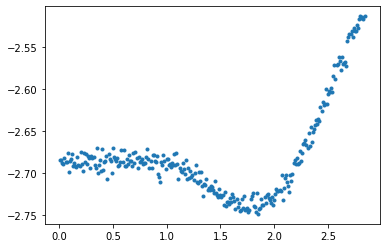

In [57]:
plt.plot(q_time_list_qiskit4,q_mag_list_qiskit4,".")

In [42]:
np.savetxt(f'/Users/kazuki/Downloads/Qiskit_Schwinger_Jet_N{16}_T{8}_g_{1}_a1.dat',data_save)

In [29]:
q_mag_list_qiskit5=[q_mag_list_qiskit4[i]-q_mag_list_qiskit4[0] for i in range(len(q_mag_list_qiskit4))]

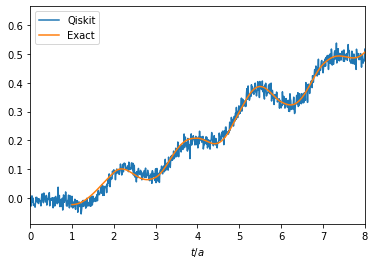

In [47]:
plt.plot(q_time_list_qiskit4,q_mag_list_qiskit5,label="Qiskit")
ss=np.loadtxt("/Users/kazuki/Downloads/record_OBC-Gauss_LatticeSize-16_mass-1.000_sign-1.dat",usecols=[0,4])
plt.plot(ss[:,0],ss[:,1]+7.07,label="Exact")

plt.xlim([0,8])
plt.xlabel("$t/a$")
plt.legend()
plt.savefig("Qiskit_Exact_Schwinger_Jet_N16.png")